# Data description :


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
df=pd.read_csv("C:\\Users\\Ashok malla\\Downloads\\haberman.csv")

In [2]:
#top 5 rows
#last 5 rows
df.head
df.tail

<bound method NDFrame.tail of      age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]>

In [3]:
#no of columns and rows in the data set
df.shape

(306, 4)

In [4]:
#column names
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

# EDA

In [5]:
#Null values in the data set
df.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [6]:
df['status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    73.5%
2    26.5%
Name: status, dtype: object

# observation :


In [7]:
# unique values with type in data set 
df["age"].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
      dtype=int64)

In [8]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# observation :
*total number of datase in Rows = 306 (count)
*Avg of each column (mean)
*min number in variable (min)
*maximum number in variable (max)


In [9]:
#types of variable in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


*Name of the columns and the dtype of columns.

# pair plot 

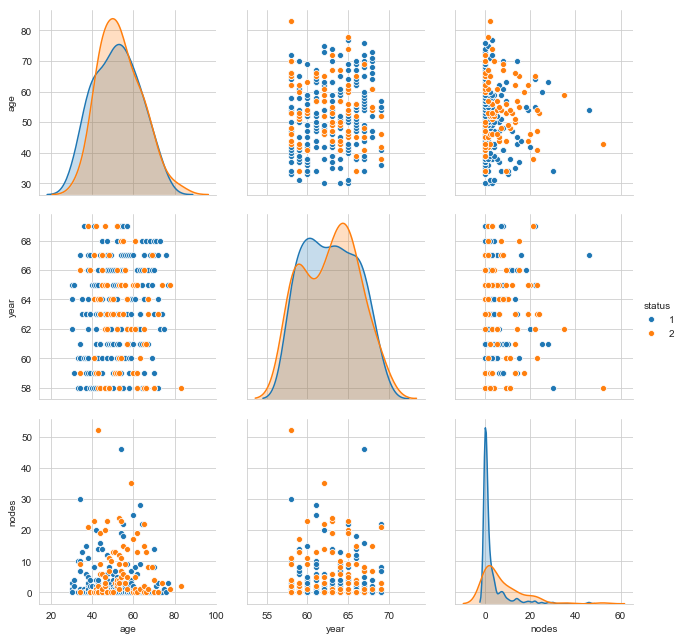

In [10]:
#scatter plot with pair plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, vars = ["age", "year", "nodes"], hue="status",height=3);
plt.show()

# observation :

# Box plot

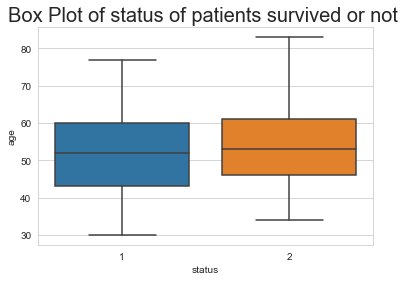

In [11]:
sns.boxplot(x='status',y='age', data=df)
plt.title("Box Plot of status of patients survived or not ", fontsize=20)
plt.show()

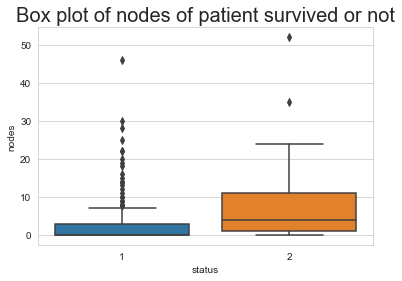

In [12]:
sns.boxplot(x='status',y='nodes', data=df)
plt.title("Box plot of nodes of patient survived or not",fontsize=20)
plt.show()

# observation :


# PDF(probability density function) & CDF (probability density function)

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


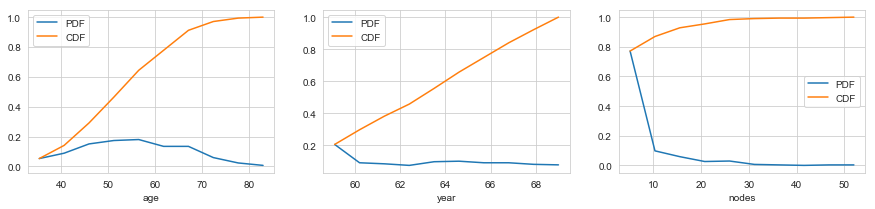

In [13]:
#pdf abd cdf refer by(https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis)
plt.figure(figsize=(15,3))
for idx, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)
    plt.legend(('PDF','CDF'))

Text(0.5,1,'voilin plot of age vs status')

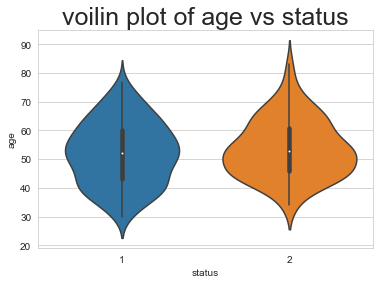

In [14]:
#vailin plot is like a box plot
sns.violinplot(x="status",y="age",data=df)
plt.title("voilin plot of age vs status",fontsize=25)

Text(0.5,1,'voilin plot of year vs status')

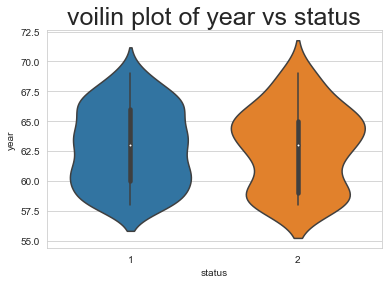

In [15]:
sns.violinplot(x="status",y="year",data=df)
plt.title("voilin plot of year vs status",fontsize=25)

Text(0.5,1,'voilin plot of Nodes vs status')

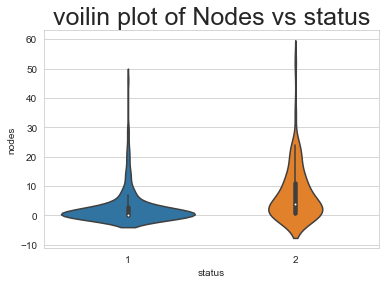

In [16]:
sns.violinplot(x="status",y="nodes",data=df)
plt.title("voilin plot of Nodes vs status",fontsize=25)


# observation :

# PDF

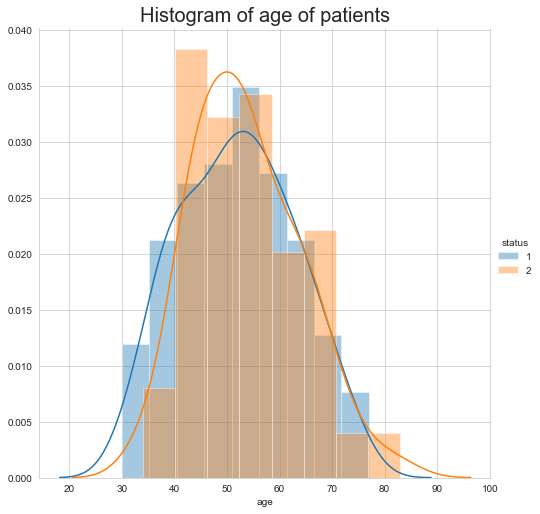

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(df , hue = "status" , height=7 ).map(sns.distplot , "age").add_legend();
plt.title("Histogram of age of patients",fontsize=20)
plt.show()

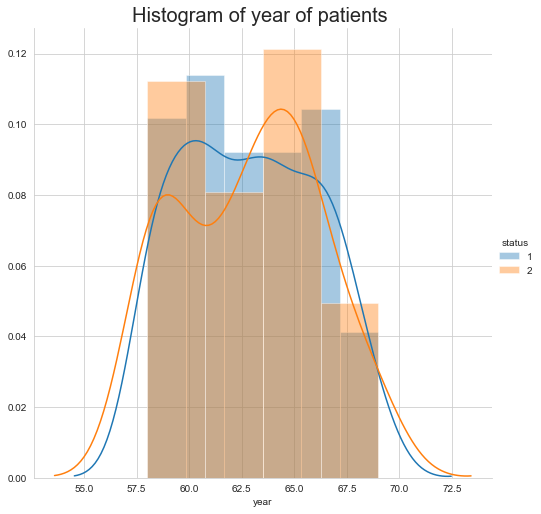

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(df , hue = "status" , height=7 ).map(sns.distplot , "year").add_legend();
plt.title("Histogram of year of patients ",fontsize=20)
plt.show()

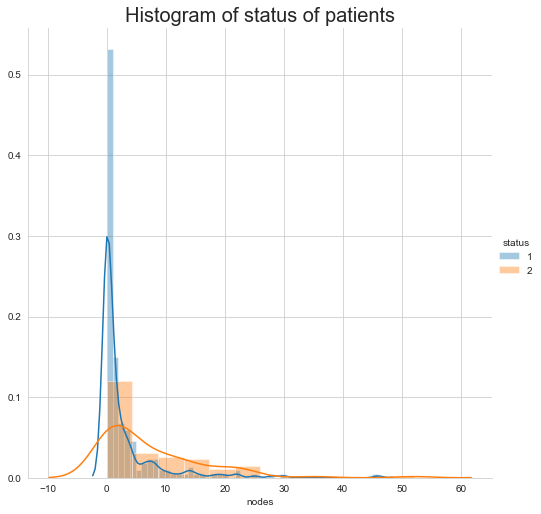

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(df , hue = "status" , height =7 ).map(sns.distplot , "nodes").add_legend();
plt.title("Histogram of status of patients",fontsize=20)
plt.show()

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


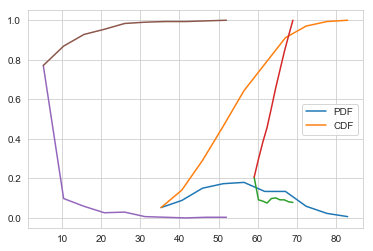

In [20]:

counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(df['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(df['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(('PDF','CDF'))

plt.show();

# observation : 